<div style="padding: 0px ; background-size: cover ; border-radius: 5px ; height: 200px ; width: 100%">
    <div style="float: right ; margin: 20px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.9) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , .8) ; line-height: 100%">TP : dosages
            </div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Oxydo-réduction | Dosage de la vitamine C
             </div>
        </div>
    </div>
</div>

In [1]:
# commande permettant d'insérer les figures matplotlib dans les notebooks
%matplotlib widget

# import des librairies 
import numpy as np
import matplotlib.pyplot as plt

# Vérification de la concentration de la solution de diiode

La réaction chimique de titrage est la suivante :
$$\text{I}_2 + 2\text{S}_2\text{O}_3^{2-} = 2\text{I}^- + \text{S}_4\text{O}_6^{2-}$$

qui est bien sûr quantitative, rapide, unique et dont l'équivalence est facile à repérer par un changement de couleur. Ce changement de couleur est d'autant plus net, qu'il est souligné par un ajout de thiodène en fin de titrage.</br>

À l'équivalence, les quantités de matières en diiode initialement versé et en thiosulfate ajouté lors du titrage vérifient : 
$$n_{\text{I}_2}^0 = \dfrac{n_{\text{S}_2\text{O}_3^{2-}}^0}{2}$$

dont on déduit par mesure du volume à l'équivalence :
$$C_{\text{I}_2} = C_{\text{S}_2\text{O}_3^{2-}}\dfrac{V_\text{éq}}{2V_{\text{I}_2}^0}$$

#### Remarque
Les précisions associées aux diverses verreries utilisées sont issues des sites web suivants : 
* https://www.aqualabo.fr/burette-graduee-avec-robinet-verre-1-10-25-ml-b381.html
* https://www.dutscher.com/frontoffice/product?produitId=0M-06-03


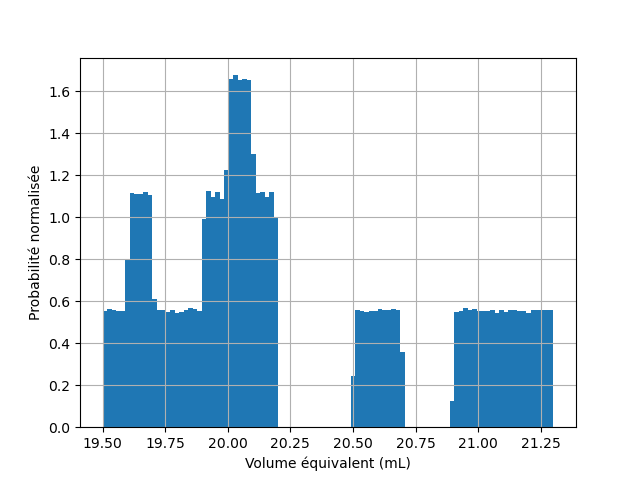

La valeur moyenne du volume à l'équivalence calculée est :  20.2 +/- 0.53 mL


In [2]:
# Valeurs relevées par les divers groupes de TP
Veq = np.array([20.1, 20.1, 19.9, 21.2, 20.6, 19.7, 20.0, 21.0, 19.6]) # volumes en mL
u_Veq = np.array(len(Veq)*[0.1]) # volumes en mL

# Simulation MonteCarlo pour valeur moyenne et incertitude
N = 100000
Veq_store = []
for j in range(len(Veq)):
    for i in range(N):
        Veq_store.append(Veq[j]+np.random.uniform(-1,1)*u_Veq[j])

Veq_moy = np.mean(Veq_store)
u_Veq_moy = np.std(Veq_store, ddof=1)

plt.figure()
plt.hist(Veq_store,bins=100, density=True, stacked=True)
plt.xlabel("Volume équivalent (mL)")
plt.ylabel("Probabilité normalisée")
plt.grid(True)
plt.show()

print("La valeur moyenne du volume à l'équivalence calculée est : ", format(Veq_moy, "#.1f"), "+/-", format(u_Veq_moy, "#.2f"),"mL")

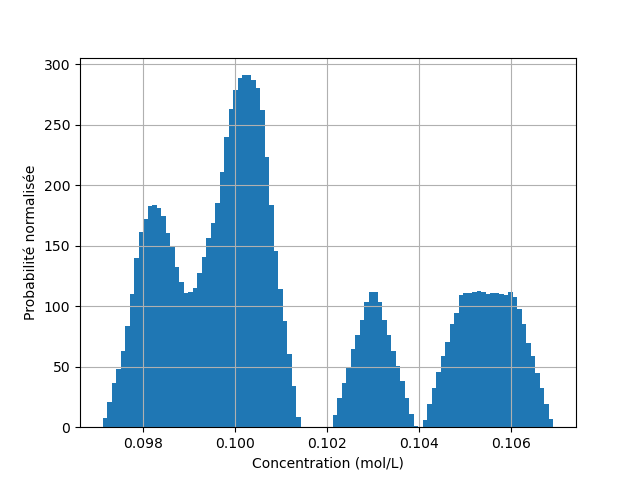

La valeur moyenne de la concentration de diiode calculée est :  0.101 +/- 2.7e-03 mole/L


In [3]:
C_S2O3 = 0.1 # précision "infinie" supposée
V_I2 = 10 # en mL
u_V_I2 = 0.04 # en mL

# Simulation MonteCarlo pour valeur moyenne et incertitude
N = 100000
C_I2_store = []
for j in range(len(Veq)):
    for i in range(N):
        C_I2_store.append(C_S2O3*(Veq[j]+np.random.uniform(-1,1)*u_Veq[j])/(2*(V_I2+np.random.uniform(-1,1)*u_V_I2)))

C_I2_moy = np.mean(C_I2_store)
u_C_I2_moy = np.std(C_I2_store, ddof=1)

plt.figure()
plt.hist(C_I2_store,bins=100, density=True, stacked=True)
plt.xlabel("Concentration (mol/L)")
plt.ylabel("Probabilité normalisée")
plt.grid(True)
plt.show()

print("La valeur moyenne de la concentration de diiode calculée est : ", format(C_I2_moy, "#.3f"), "+/-", format(u_C_I2_moy, "#.1e"),"mole/L")

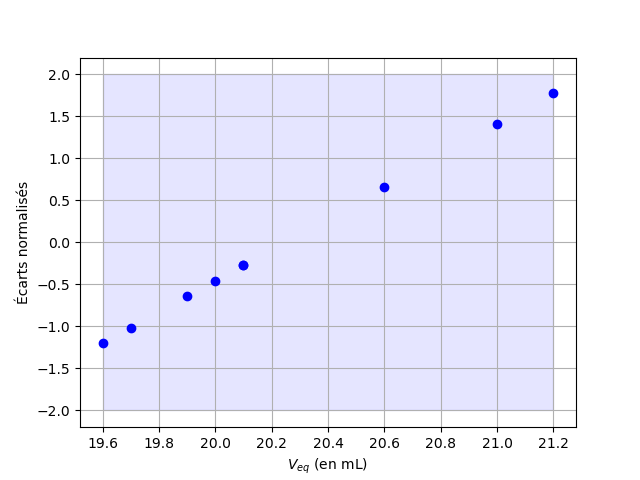

In [4]:
C_I2_mes = C_S2O3*Veq/(2*V_I2)
res = C_I2_mes-C_I2_moy  # on teste l'écart sur C entre les données mesurées et la valeur moyenne calculée
En = res/u_C_I2_moy # on calcule le z-score

plt.figure()
plt.plot(Veq, En, 'bo')             # écarts normalisés
plt.fill_between([np.min(Veq), np.max(Veq)], y1 = -2, y2 = 2, color = 'blue', alpha = .1)    # pour mieux visualiser le domaine des En acceptables
plt.xlabel(r'$V_{eq}$ (en mL)')
plt.ylabel("Écarts normalisés")
plt.grid()
plt.show()

Le Z-score de chacune des mesures réalisée par les groupes de TP est dans l'intervalle de validité. On garde donc l'ensemble des valeurs mesurées.

# Mesure de la masse en AscH2 dans le comprimé de vitamine C

La mesure de la masse d'AscH2 se fait en deux temps. On fait d'abord réagir un excès précisément connu de diiode avec la vitamine C selon la réaction quantitative suivante : 
$$\text{I}_2 + \text{AscH}_2 = 2\text{I}^- + \text{Asc} + 2\text{H}^+$$

On note $n_\text{res}=n_{\text{I}_2}^0-n_\text{reac}$ la quantité de matière de diiode restant dans le bécher après réaction.</br>

On mesure $n_\text{res}$ par titrage avec le thiosulfate de sodium selon le protocole précédent. On peut alors en déduire $n_\text{reac}$ et donc la quantité de matière de $\text{AscH}_2$ initialement présente dans la solution de départ.</br>

La masse de vitamine C présente dans le sachet s'en déduit, avec :
$$m_{\text{AscH}_2}=\dfrac{100}{20}M_{\text{AscH}_2}\left(C_{\text{I}_2}V_{\text{I}_2}-\dfrac{C_{\text{S}_2\text{O}_3^{2-}}V_\text{eq}}{2}\right)$$

## Groupe 1
La démarche pré-dosage est la suivante :
* La poudre est directement versée du mortier dans le filtre sans précaution particulière ;
* le filtrage est réalisé par gravité à travers un simple papier filtre ;
* le diiode et la vitamine C extraite sont laissés en contact pendant 30 minutes.

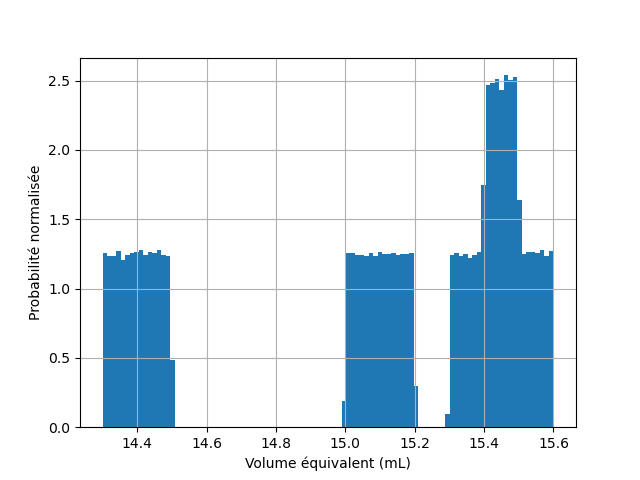

La valeur moyenne du volume à l'équivalence calculée est :  15.1 +/- 4.3e-01 mL


In [5]:
Veq_2 = np.array([15.5, 14.4, 15.4, 15.1]) # volumes à l'équivalence en mL
u_Veq_2 = np.array(len(Veq_2)*[0.1]) # volumes en mL

# Simulation MonteCarlo pour valeur moyenne et incertitude
N = 100000
Veq_2_store = []
for j in range(len(Veq_2)):
    for i in range(N):
        Veq_2_store.append(Veq_2[j]+np.random.uniform(-1,1)*u_Veq_2[j])

Veq_2_moy = np.mean(Veq_2_store)
u_Veq_2_moy = np.std(Veq_2_store, ddof=1)

plt.figure()
plt.hist(Veq_2_store,bins=100, density=True, stacked=True)
plt.xlabel("Volume équivalent (mL)")
plt.ylabel("Probabilité normalisée")
plt.grid(True)
plt.show()

print("La valeur moyenne du volume à l'équivalence calculée est : ", format(Veq_2_moy, "#.1f"), "+/-", format(u_Veq_2_moy, "#.1e"),"mL")

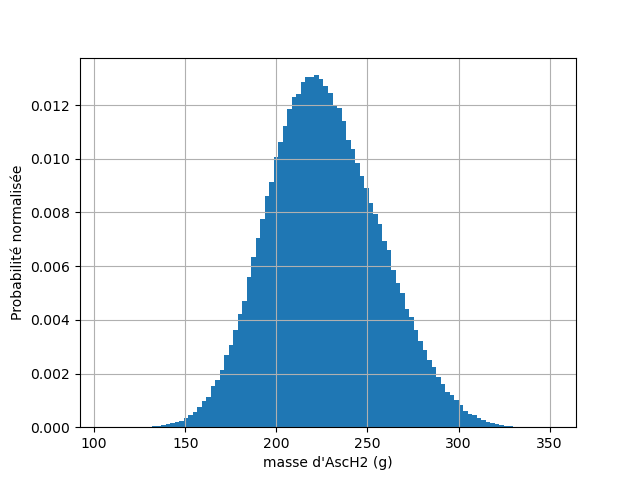

La valeur moyenne de la masse d'AscH2 calculée est :  226. +/- 3.0e+01 mg


In [6]:
M_AscH2 = 176.13 # en g/mol précision "infinie" supposée
u_M_AscH2 = .005/np.sqrt(3) # précision type affichage de graduation, distribution uniforme
V_mere = 100 # volume solution mère en mL
u_V_mere = 0.08 # en mL
V_prel = 20 # volume solution prélevée en mL
u_V_prel = 0.03 # en mL
VI2 = 10 # en mL
u_VI2 = .02 # en mL

# Simulation MonteCarlo pour valeur moyenne et incertitude
N = 100000
m_AscH2_store = []
for j in range(len(Veq_2_store)):
    V_mere_calc = V_mere + np.random.uniform(-1,1)*u_V_mere
    M_AscH2_calc = M_AscH2 + np.random.uniform(-1,1)*u_M_AscH2
    C_I2_calc = C_I2_moy + np.random.normal()*u_C_I2_moy
    VI2_calc = (VI2 + np.random.uniform(-1,1)*u_VI2)
    V_prel_calc = V_prel + np.random.uniform(-1,1)*u_V_prel
    m_AscH2_store.append(M_AscH2_calc*V_mere_calc*(C_I2_calc*VI2_calc-Veq_2_store[j]*C_S2O3/2)/V_prel_calc)

m_AscH2_moy = np.mean(m_AscH2_store)
u_m_AscH2_moy = np.std(m_AscH2_store, ddof=1)

plt.figure()
plt.hist(m_AscH2_store,bins=100, density=True, stacked=True)
plt.xlabel("masse d'AscH2 (g)")
plt.ylabel("Probabilité normalisée")
plt.grid(True)
plt.show()

print("La valeur moyenne de la masse d'AscH2 calculée est : ", format(m_AscH2_moy, "#.0f"), "+/-", format(u_m_AscH2_moy, "#.1e"),"mg")

## Groupe 2
La démarche pré-dosage est la suivante :
* La poudre est d'abord mise en solution avec un volume d'eau distillé d'environ 30 mL ;
* la solution obtenue est versée du mortier dans le filtre ;
* le filtrage est réalisé par gravité à travers un simple papier filtre ;
* le diiode et la vitamine C extraite sont laissés en contact pendant 25 à 35 minutes.

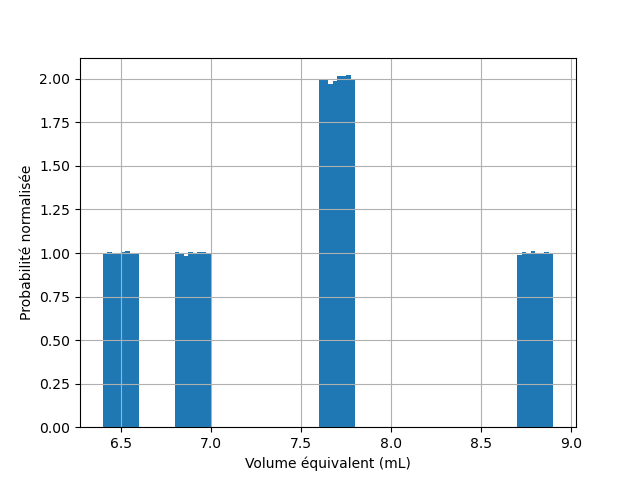

La valeur moyenne du volume à l'équivalence calculée est :  7.5 +/- 7.9e-01 mL


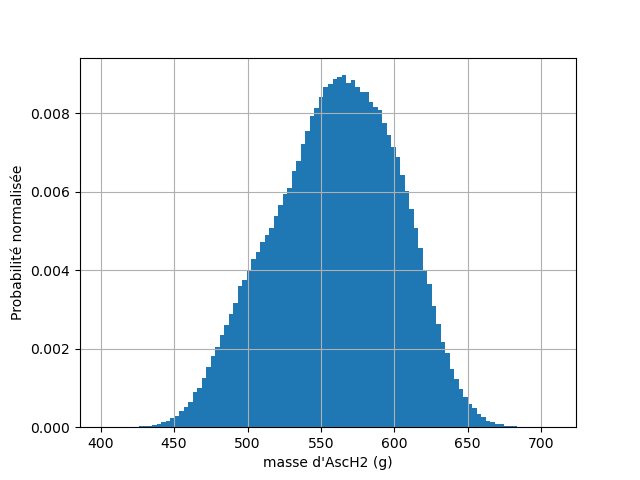

La valeur moyenne de la masse d'AscH2 calculée est :  560. +/- 4.2e+01 mg


In [7]:
Veq_3 = np.array([6.9, 7.7, 6.5, 7.7, 8.8])

u_Veq_3 = np.array(len(Veq_3)*[0.1]) # volumes en mL

# Simulation MonteCarlo pour valeur moyenne et incertitude
N = 100000
Veq_3_store = []
for j in range(len(Veq_3)):
    for i in range(N):
        Veq_3_store.append(Veq_3[j]+np.random.uniform(-1,1)*u_Veq_3[j])

Veq_3_moy = np.mean(Veq_3_store)
u_Veq_3_moy = np.std(Veq_3_store, ddof=1)

plt.figure()
plt.hist(Veq_3_store,bins=100, density=True, stacked=True)
plt.xlabel("Volume équivalent (mL)")
plt.ylabel("Probabilité normalisée")
plt.grid(True)
plt.show()

print("La valeur moyenne du volume à l'équivalence calculée est : ", format(Veq_3_moy, "#.1f"), "+/-", format(u_Veq_3_moy, "#.1e"),"mL")

M_AscH2 = 176.13 # en g/mol précision "infinie" supposée
u_M_AscH2 = .005/np.sqrt(3) # précision type affichage de graduation, distribution uniforme
V_mere = 100 # volume solution mère en mL
u_V_mere = 0.08 # en mL
V_prel = 20 # volume solution prélevée en mL
u_V_prel = 0.03 # en mL
VI2 = 10 # en mL
u_VI2 = .02 # en mL

# Simulation MonteCarlo pour valeur moyenne et incertitude
N = 10000
m_AscH2_store = []
for j in range(len(Veq_3_store)):
    V_mere_calc = V_mere + np.random.uniform(-1,1)*u_V_mere
    M_AscH2_calc = M_AscH2 + np.random.uniform(-1,1)*u_M_AscH2
    C_I2_calc = C_I2_moy + np.random.normal()*u_C_I2_moy
    VI2_calc = (VI2 + np.random.uniform(-1,1)*u_VI2)
    V_prel_calc = V_prel + np.random.uniform(-1,1)*u_V_prel
    m_AscH2_store.append(M_AscH2_calc*V_mere_calc*(C_I2_calc*VI2_calc-Veq_3_store[j]*C_S2O3/2)/V_prel_calc)

m_AscH2_moy = np.mean(m_AscH2_store)
u_m_AscH2_moy = np.std(m_AscH2_store, ddof=1)

plt.figure()
plt.hist(m_AscH2_store,bins=100, density=True, stacked=True)
plt.xlabel("masse d'AscH2 (g)")
plt.ylabel("Probabilité normalisée")
plt.grid(True)
plt.show()

print("La valeur moyenne de la masse d'AscH2 calculée est : ", format(m_AscH2_moy, "#.0f"), "+/-", format(u_m_AscH2_moy, "#.1e"),"mg")